# Reconstruction exmaple

## Import the relevant libraries

In [4]:
import cirq
import numpy as np
import sympy
from qiskit import *
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

In [5]:
import server

server = server.Server()

print("test")

test


## Register team

In [6]:
server.register("Qnonymous")

Successfully registered new team, 'Qnonymous'. Good luck!

Reminder: attacks and probes are limited to 20 per vault, per team.
Vault index 0 is a test vault with 50 test probes and attacks, and does not count towards your final score.
There is a request frequency limit of 10 probes/attacks per minute, per team.


## Test probe using vault 0

In [6]:
cq = cirq.Circuit()
cq.append(cirq.H.on(cirq.LineQubit(0)))
cq.append(cirq.H.on(cirq.LineQubit(1)))
cq.append(cirq.H.on(cirq.LineQubit(2)))
test_probe = cirq.qasm(cq)
print(test_probe)

// Generated from Cirq v1.3.0

OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [q(0), q(1), q(2)]
qreg q[3];


h q[0];
h q[1];
h q[2];



In [21]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!Be careful about the Endian of returned histogram!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
res = server.probe(vault_index=0, circuit=test_probe)

In [22]:
print(res)

{'0': 0.25, '3': 0.22, '5': 0.32, '6': 0.21}


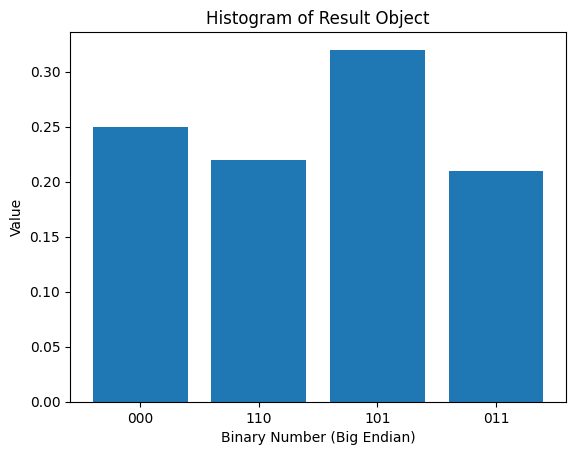

In [14]:
# Convert keys to integers and sort them
keys_as_int = sorted(map(int, res.keys()))

# Convert integers to binary representation in big endian
binary_labels = [format(key, '03b')[::-1] for key in keys_as_int]

# Extract corresponding values
values = [res[str(key)] for key in keys_as_int]

# Plotting
plt.bar(binary_labels, values)
plt.xlabel('Binary Number (Big Endian)')
plt.ylabel('Value')
plt.title('Histogram of Result Object')
plt.show()


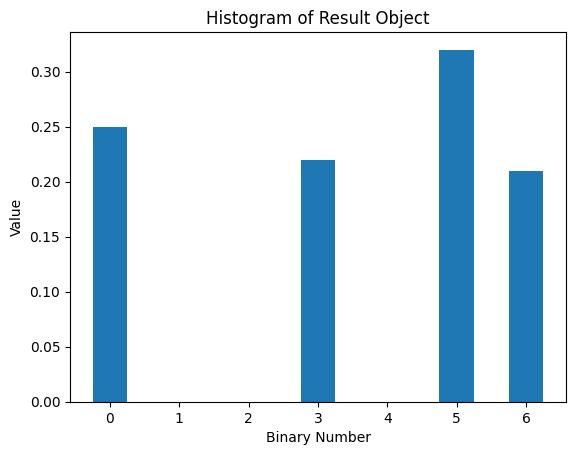

In [19]:
import matplotlib.pyplot as plt

# Your result object
result = {'0': 0.25, '3': 0.22, '5': 0.32, '6': 0.21}

# Extract keys and values
keys = [int(key) for key in result.keys()]
values = list(result.values())

# Plotting the histogram
plt.bar(keys, values, width=0.5, align='center')

# Adding labels and title
plt.xlabel('Binary Number')
plt.ylabel('Value')
plt.title('Histogram of Result Object')

# Show the plot
plt.show()


## Test attack using vault 0

In [9]:
cq = cirq.Circuit()
cq.append(cirq.CNOT.on(cirq.LineQubit(0), cirq.LineQubit(2)))
cq.append(cirq.CNOT.on(cirq.LineQubit(0), cirq.LineQubit(1)))
cq.append(cirq.H.on(cirq.LineQubit(0)))
test_attack = cirq.qasm(cq)
print(test_attack)

// Generated from Cirq v1.3.0

OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [q(0), q(1), q(2)]
qreg q[3];


cx q[0],q[2];
cx q[0],q[1];
h q[0];



In [10]:
server.attack(vault_index=0, circuit=test_attack)

{'rawScore': 1, 'score': 0.8, 'costFactor': 0.8}

## Check state

Check state for your team's current score(s), and number of probes/attacks remaining

In [30]:
server.state()

{'team': 'Qnonymous',
 'totalAvgScore': 0,
 'topVaultScores': [0.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'probesRemaining': [36, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
 'attacksRemaining': [38, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

In [31]:
cq_p1 = cirq.Circuit()
cq_p1.append(cirq.H.on(cirq.LineQubit(0)))
cq_p1.append(cirq.H.on(cirq.LineQubit(1)))
cq_p1.append(cirq.H.on(cirq.LineQubit(2)))

probe_v1 = cirq.qasm(cq_p1)
print(probe_v1)

// Generated from Cirq v1.3.0

OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [q(0), q(1), q(2)]
qreg q[3];


h q[0];
h q[1];
h q[2];



In [32]:
res = server.probe(vault_index=1, circuit=probe_v1)

In [33]:
print(res)

{'2': 0.005, '3': 0.005, '4': 0.01, '5': 0.015, '6': 0.005, '9': 0.01, '10': 0.015, '11': 0.02, '12': 0.025, '13': 0.04, '14': 0.025, '15': 0.01, '21': 0.005, '23': 0.005, '25': 0.005, '26': 0.005, '27': 0.015, '28': 0.01, '29': 0.01, '30': 0.02, '32': 0.015, '33': 0.035, '34': 0.02, '35': 0.035, '36': 0.04, '37': 0.065, '38': 0.03, '39': 0.065, '40': 0.005, '41': 0.04, '42': 0.03, '43': 0.065, '44': 0.045, '45': 0.04, '46': 0.04, '47': 0.02, '48': 0.005, '53': 0.01, '56': 0.005, '57': 0.015, '58': 0.01, '59': 0.015, '60': 0.02, '61': 0.03, '62': 0.03, '63': 0.01}


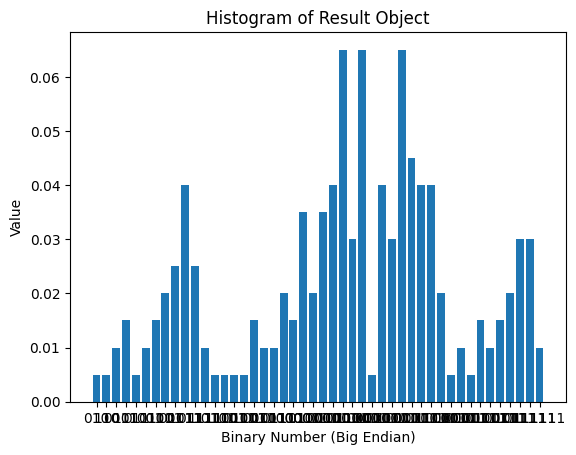

In [35]:
# Convert keys to integers and sort them
keys_as_int = sorted(map(int, res.keys()))

# Convert integers to binary representation in big endian
binary_labels = [format(key, '03b')[::-1] for key in keys_as_int]

# Extract corresponding values
values = [res[str(key)] for key in keys_as_int]

# Plotting
plt.bar(binary_labels, values)
plt.xlabel('Binary Number (Big Endian)')
plt.ylabel('Value')
plt.title('Histogram of Result Object')
plt.show()

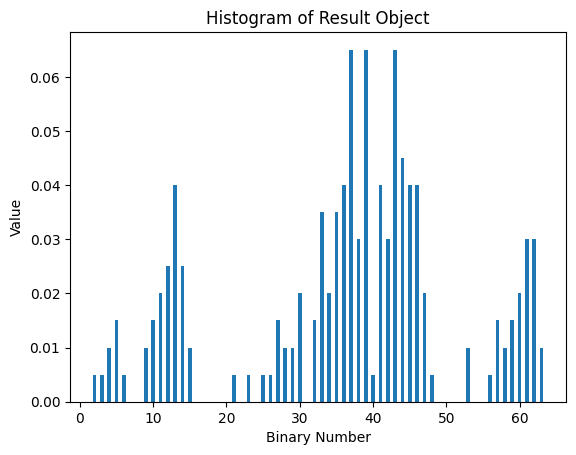

In [36]:
# Your result object
result = {'2': 0.005, '3': 0.005, '4': 0.01, '5': 0.015, '6': 0.005, '9': 0.01, '10': 0.015, '11': 0.02, '12': 0.025, '13': 0.04, '14': 0.025, '15': 0.01, '21': 0.005, '23': 0.005, '25': 0.005, '26': 0.005, '27': 0.015, '28': 0.01, '29': 0.01, '30': 0.02, '32': 0.015, '33': 0.035, '34': 0.02, '35': 0.035, '36': 0.04, '37': 0.065, '38': 0.03, '39': 0.065, '40': 0.005, '41': 0.04, '42': 0.03, '43': 0.065, '44': 0.045, '45': 0.04, '46': 0.04, '47': 0.02, '48': 0.005, '53': 0.01, '56': 0.005, '57': 0.015, '58': 0.01, '59': 0.015, '60': 0.02, '61': 0.03, '62': 0.03, '63': 0.01}

# Extract keys and values
keys = [int(key) for key in result.keys()]
values = list(result.values())

# Plotting the histogram
plt.bar(keys, values, width=0.5, align='center')

# Adding labels and title
plt.xlabel('Binary Number')
plt.ylabel('Value')
plt.title('Histogram of Result Object')

# Show the plot
plt.show()